# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "44533df9f3320eaafcd6f4b297edaa697070f36c"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from macd_crossover_v2 import MACDCrossoverV2 as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'data': 'success',
 'cstcId': 123723,
 'strategyId': 'f649e98cff3845d981025d2b5f7671c9'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKPR0D9M7AAZSKIPEZW0', 
        'CLIENT_API_SECRET': 'o0Of72gD4jiVrmkq6P3RmggEbhjEhbak0c3RY0Eb'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
   'TIMEPERIOD_FAST': 12,
   'TIMEPERIOD_SLOW': 26,
   'TIMEPERIOD_SIGNAL': 9,
}

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2023-05-01 09:15 -0400', 
    end='2023-05-11 15:30 -0400', 
    instrument=['NASDAQ:MSFT', 'NASDAQ:AAPL'], 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

Strategy Trades have been deleted successfully 
Setting Strategy Config... Success.
Submitting BACKTESTING job... Success.


### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)
print(logs)

[2023-06-10 19:08:19] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-06-10 19:08:19] Sanity checks on cfg successful.
[2023-06-10 19:08:19] Currency set to "USD"
[2023-06-10 19:08:19] Setting up broker connection...
[2023-06-10 19:08:21] Broker connection has been setup successfully.
[2023-06-10 19:08:21] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '1000000000.00'
[2023-06-10 19:08:21] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-06-10 19:08:21] Welcome ALGOBULLS VIRTUAL USER!
[2023-06-10 19:08:21] Reading strategy...
[2023-06-10 19:08:22] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports (Backtesting)

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)

In [17]:
pnl_reports

instrument_segment instrument_tradingsymbol     entry_timestamp  \
0               NASDAQ                     MSFT 2023-05-01 18:53:00   
1               NASDAQ                     AAPL 2023-05-01 19:01:00   
2               NASDAQ                     AAPL 2023-05-01 19:07:00   
3               NASDAQ                     AAPL 2023-05-01 19:11:00   
4               NASDAQ                     MSFT 2023-05-01 19:14:00   
..                 ...                      ...                 ...   
198             NASDAQ                     MSFT 2023-05-11 21:00:00   
199             NASDAQ                     AAPL 2023-05-11 21:06:00   
200             NASDAQ                     MSFT 2023-05-11 21:07:00   
201             NASDAQ                     MSFT 2023-05-11 21:27:00   
202             NASDAQ                     AAPL 2023-05-11 21:28:00   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                      BUY               5              ₹       306.10   
1                      BUY               5              ₹       169.83   
2                     SELL               5              ₹       169.19   
3                      BUY               5              ₹       169.65   
4                     SELL               5              ₹       307.21   
..                     ...             ...            ...          ...   
198                    BUY               5              ₹       310.00   
199                   SELL               5              ₹       173.61   
200                   SELL               5              ₹       310.01   
201                    BUY               5              ₹       309.53   
202                    BUY               5              ₹       173.55   

         exit_timestamp exit_transaction_type  exit_quantity exit_currency  \
0   2023-05-01 19:14:00                  SELL              5             ₹   
1   2023-05-01 19:07:00                  SELL              5             ₹   
2   2023-05-01 19:11:00                   BUY              5             ₹   
3   2023-05-01 19:25:00                  SELL              5             ₹   
4   2023-05-01 19:20:00                   BUY              5             ₹   
..                  ...                   ...            ...           ...   
198 2023-05-11 21:07:00                  SELL              5             ₹   
199 2023-05-11 21:28:00                   BUY              5             ₹   
200 2023-05-11 21:27:00                   BUY              5             ₹   
201 2023-05-12 01:00:00                  SELL              5             ₹   
202 2023-05-12 01:00:00                  SELL              5             ₹   

     exit_price  pnl_absolute  pnl_cumulative_absolute  
0        307.21          5.55                     5.55  
1        169.19         -3.20                     2.35  
2        169.65         -2.30                     0.05  
3        169.83          0.90                     0.95  
4        308.17         -4.80                    -3.85  
..          ...           ...                      ...  
198      310.01          0.05                   -14.10  
199      173.55          0.30                   -13.80  
200      309.53          2.40                   -11.40  
201      309.55          0.10                   -11.30  
202      173.59          0.20                   -11.10  

[203 rows x 14 columns]

### Statistics Reports (Backtesting)

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...
                    Strategy
------------------  ----------
Start Period        2023-05-01
End Period          2023-05-11
Risk-Free Rate      0.0%
Time in Market      85.0%

Cumulative Return   -0.0%
CAGR﹪              -0.0%

Sharpe              -0.58
Prob. Sharpe Ratio  30.64%
Sortino             -0.82
Sortino/√2          -0.58
Omega               0.9

Max Drawdown        -0.0%
Longest DD Days     9

Gain/Pain Ratio     -0.41
Gain/Pain (1M)      -1.0

Payoff Ratio        1.06
Profit Factor       0.9
Common Sense Ratio  0.86
CPC Index           0.44
Tail Ratio          0.95
Outlier Win Ratio   4.05
Outlier Loss Ratio  2.83

MTD                 -0.0%
3M                  -0.0%
6M                  -0.0%
YTD                 -0.0%
1Y                  -0.0%
3Y (ann.)           -0.0%
5Y (ann.)           -0.0%
10Y (ann.)          -0.0%
All-time (ann.)     -0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  4
Recovery Factor     -0.38
Ulcer

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


                           Strategy
-------------------------  ----------
Start Period               2023-05-01
End Period                 2023-05-11
Risk-Free Rate             0.0%
Time in Market             85.0%

Cumulative Return          -0.0%
CAGR﹪                     -0.0%

Sharpe                     -0.58
Prob. Sharpe Ratio         30.64%
Smart Sharpe               -0.54
Sortino                    -0.82
Smart Sortino              -0.77
Sortino/√2                 -0.58
Smart Sortino/√2           -0.55
Omega                      0.9

Max Drawdown               -0.0%
Longest DD Days            9
Volatility (ann.)          0.0%
Calmar                     -13.89
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.0%
Kelly Criterion            -4.94%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       6
Ma

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2023-05-02  2023-05-05  2023-05-11     9     -0.000004         -0.000004
2  2023-05-01  2023-05-01  2023-05-01     0     -0.000001         -0.000001

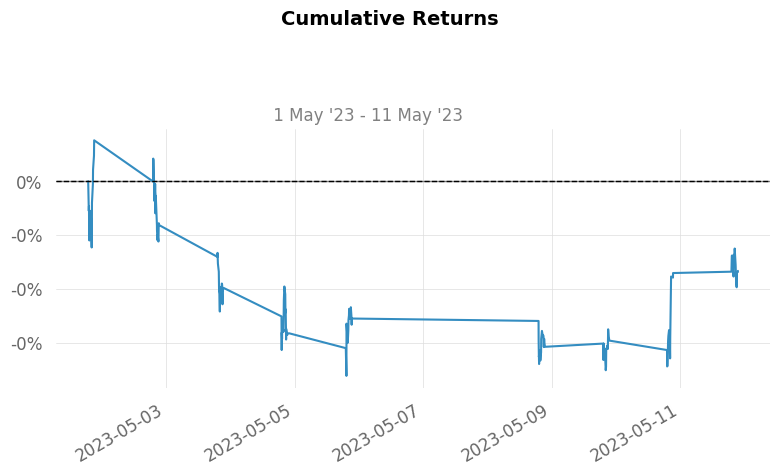

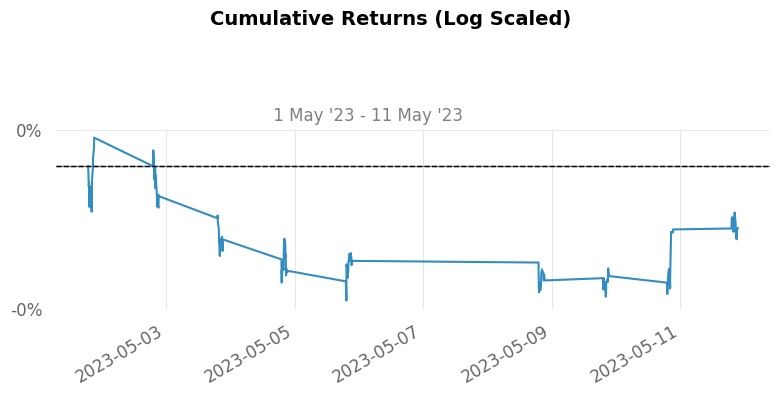

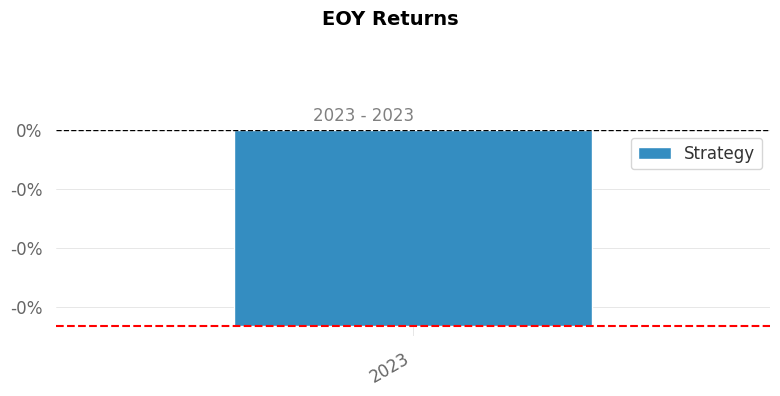

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)


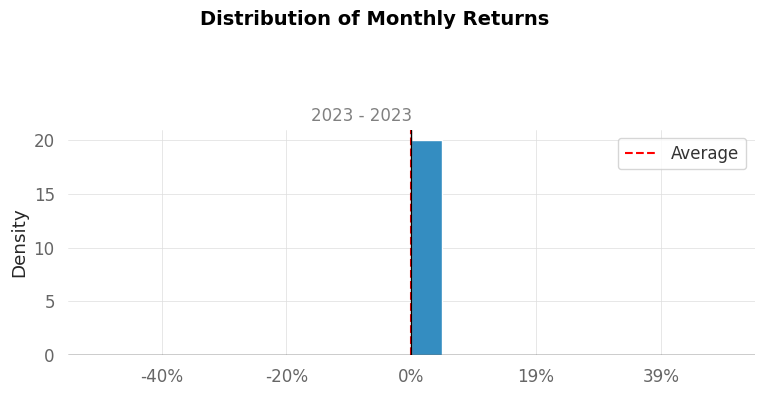

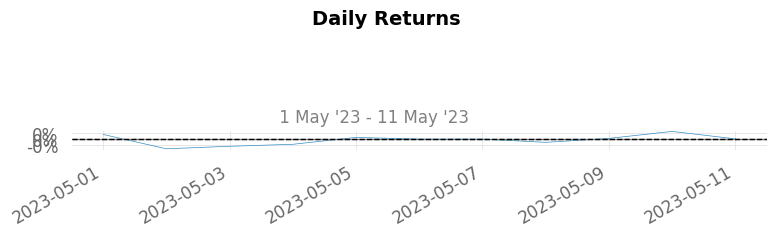

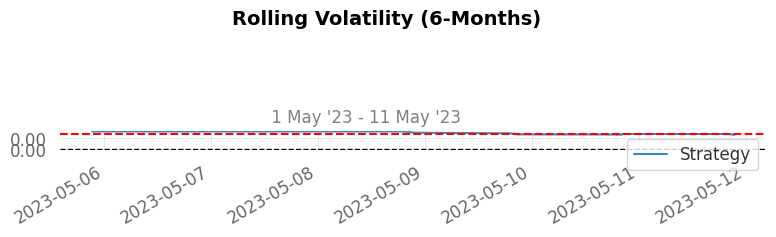

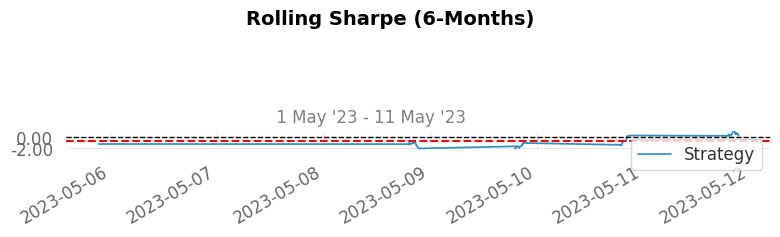

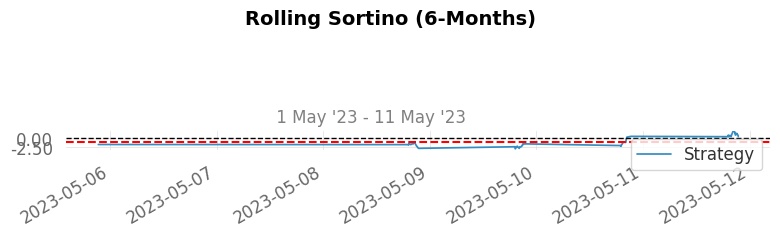

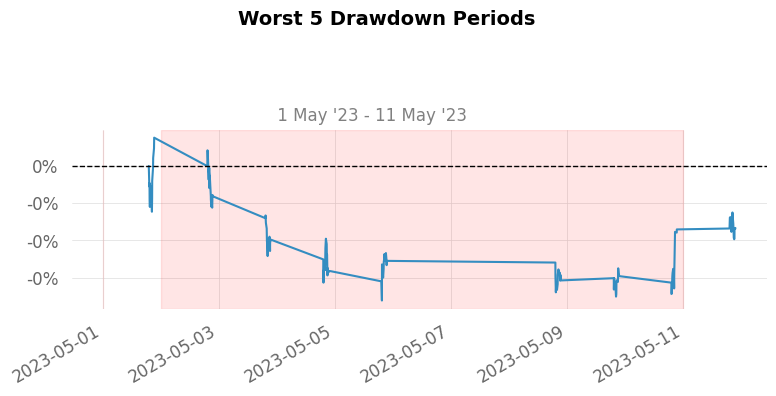

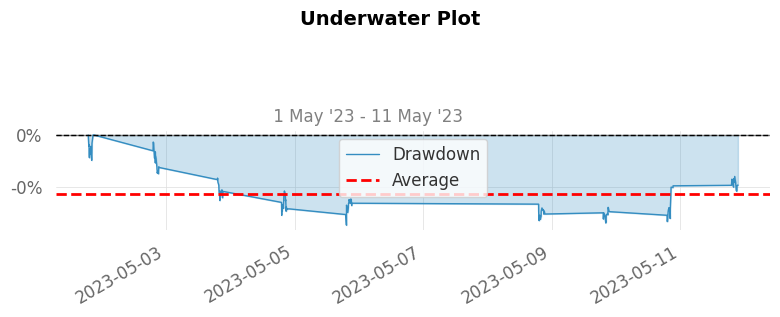

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


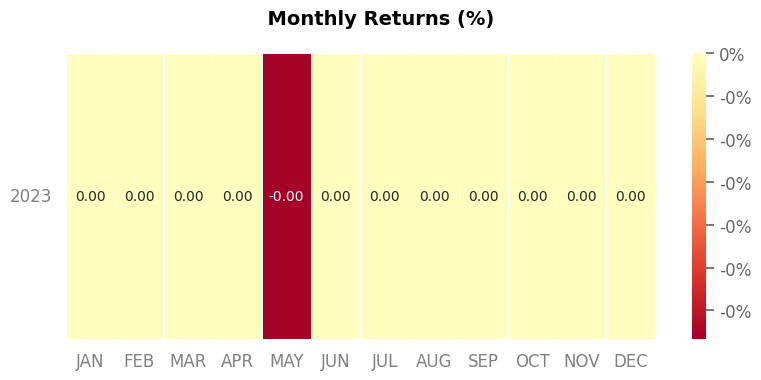

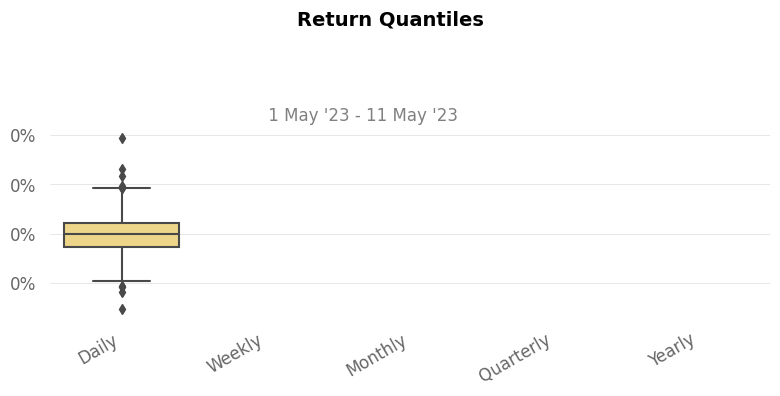

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)
/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Backtesting)

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:MSFT | 2023-05-01 09:23:00-04:00 | e55b93fe147a40019757e56a1241247a | BUY  |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2023-05-01 09:23:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2023-05-01 09:23:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2023-05-01 09:23:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2023-05-01 09:23:00.500000-04:00 | OPEN                   |       |
|  4 | 2023-05-01 09:23:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Papertrading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Papertrading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Realtrading

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Realtrading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Realtrading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Realtrading)

In [ ]:
order_history = connection.get_realtrading_report_order_history(strategy)
print(order_history)